# Comparing model predictions

The purpose of this notebook is to see how the models are differing in their predictions.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('../data/Final Data/pct-diff-mlb-games-with-preds.csv')

In [3]:
df.head()

,home_win,Y,M,avg_pct_diff,obp_pct_diff,slg_pct_diff,team_ERA_pct_diff,team_WHIP_pct_diff,team_W-L_pct_diff,team_Rank_pct_diff,...,pitcher_IP_pct_diff,ops_pct_diff,RD_pct_diff,FP_pct_diff,Rank_pct_diff,WPA_pct_diff,log_5,xgb_pred,knn_pred,nn_pred
0,1,2016,4.0,8.620726,3.092675,2.578581,7.754011,8.007859,5.263158,0.000000,...,0.0,2.805262,15.662651,-0.101523,0.000000,96.381239,0.5,1,1,1.0
1,1,2016,4.0,2.309712,0.376945,-0.040732,8.978328,-1.211283,-2.040816,50.000000,...,0.0,0.147930,-20.792079,-0.305810,50.000000,96.381239,0.5,1,1,1.0
2,0,2016,4.0,-5.864577,-7.555239,-12.023378,-1.871658,1.468752,-16.250000,75.000000,...,0.0,-10.063876,-10950.000000,-0.101626,75.000000,96.381239,0.5,0,1,0.0
3,0,2016,4.0,0.398896,-4.950458,-0.794957,14.720812,8.900281,-14.117647,0.000000,...,0.0,-2.616367,678.571429,0.203252,0.000000,96.381239,0.5,0,1,1.0
4,0,2016,4.0,-1.095675,2.427164,-5.196744,-24.444444,-13.778463,13.924051,-66.666667,...,0.0,-1.831024,1628.571429,0.101420,-66.666667,96.381239,0.5,1,1,1.0


## Column distribution by model

In [5]:
xgb_correct = df[df['xgb_pred'] == df['home_win']]
xgb_wrong = df[df['xgb_pred'] != df['home_win']]

knn_correct = df[df['knn_pred'] == df['home_win']]
knn_wrong = df[df['knn_pred'] != df['home_win']]

nn_correct = df[df['nn_pred'] == df['home_win']]
nn_wrong = df[df['nn_pred'] != df['home_win']]

In [12]:
cols = list(df.columns)
cols = [c for c in cols if c.endswith('_diff')] + ['log_5']

In [13]:
def plot_density_by_model(model_correct, model_wrong):
    for c in cols:
        plt.figure(figsize=(12, 8))
        plt.hist(model_correct[c], label='Correct', alpha=0.5, density=True)
        plt.hist(model_wrong[c], label='Wrong', alpha=0.5, density=True)
        plt.legend()
        plt.title(c)
        plt.show();

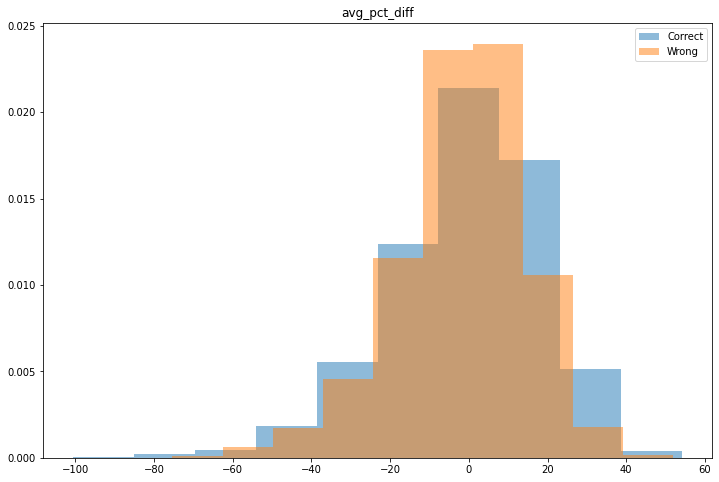

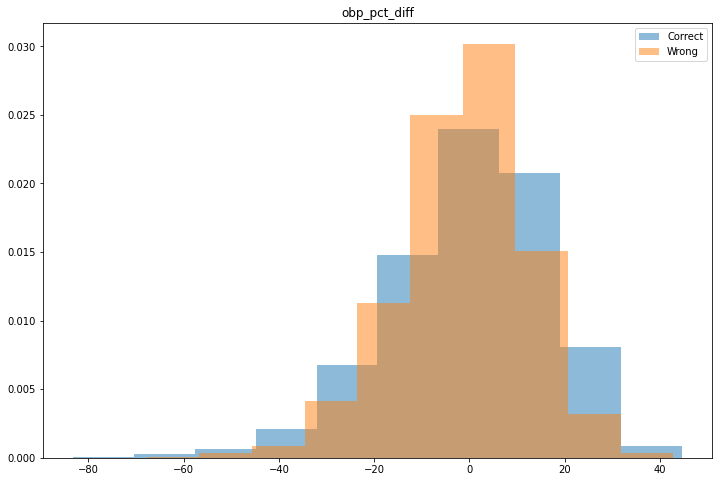

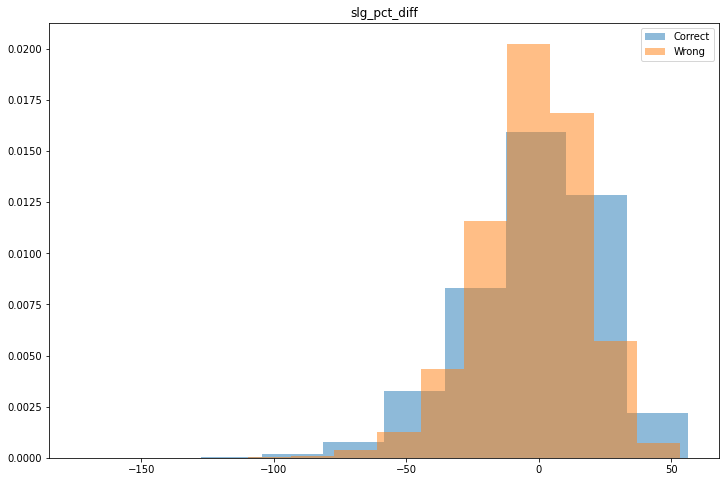

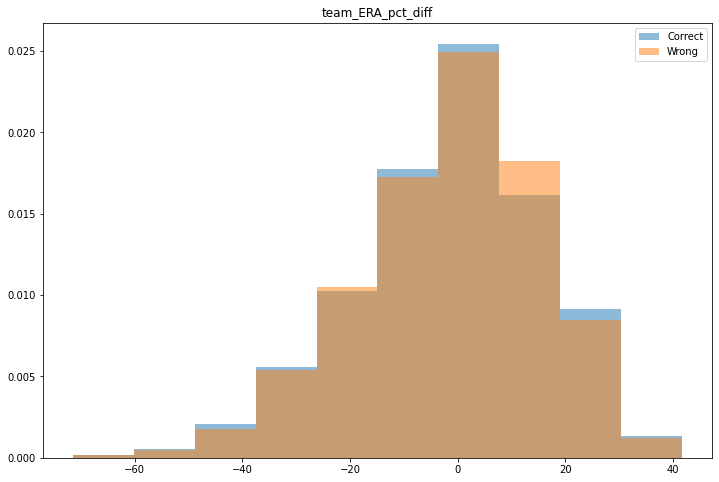

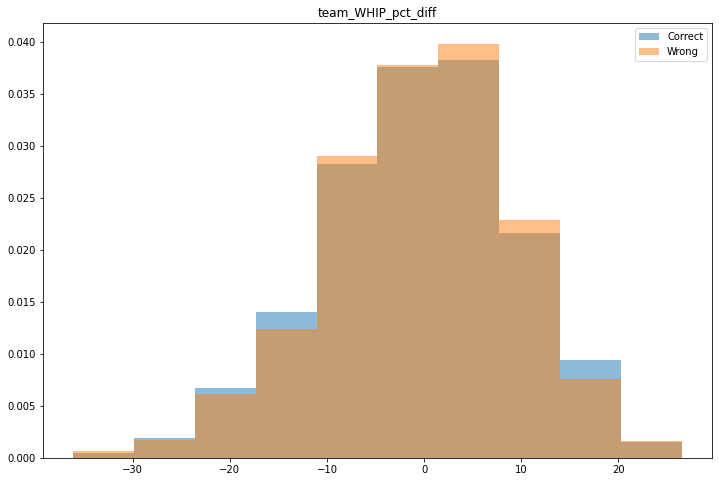

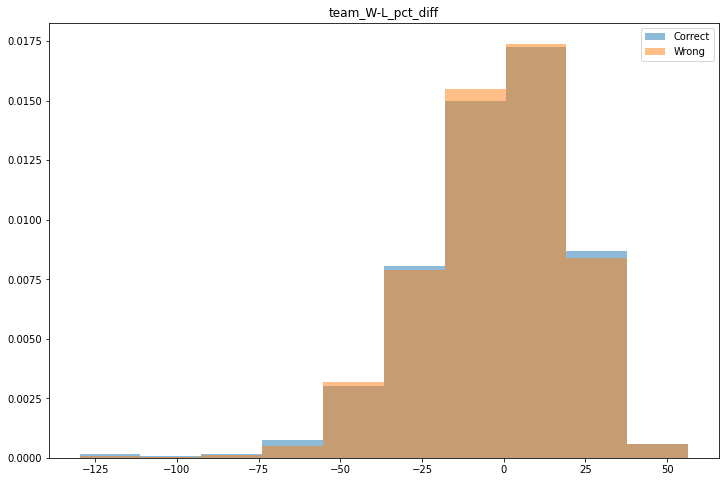

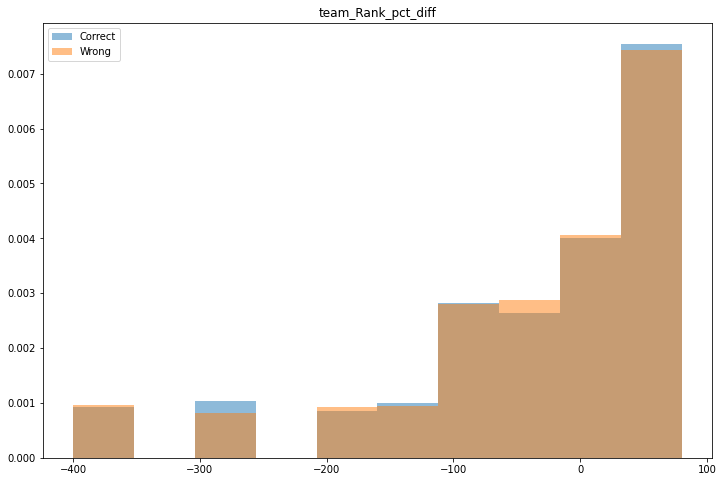

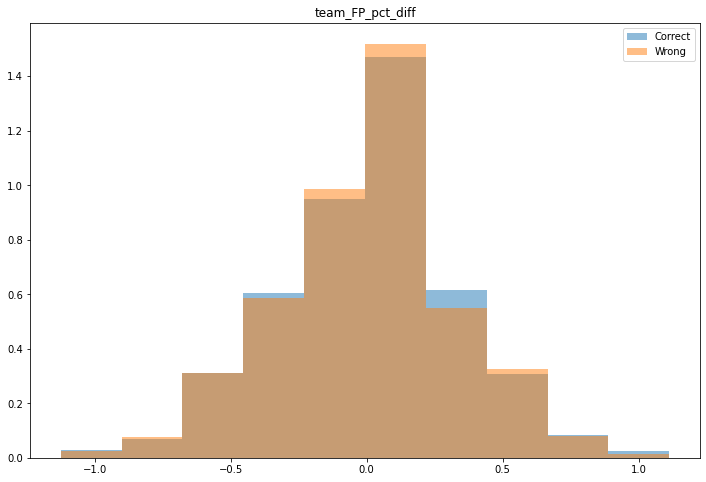

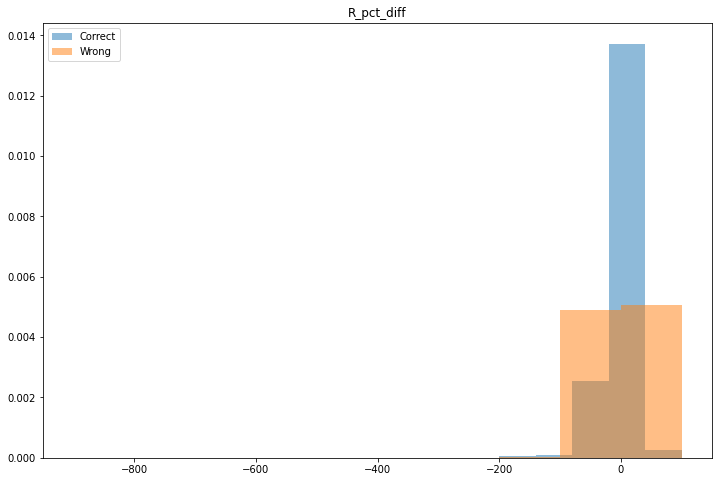

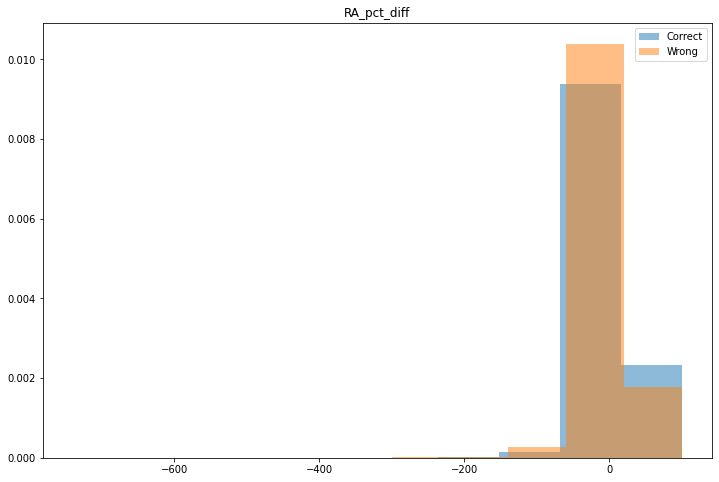

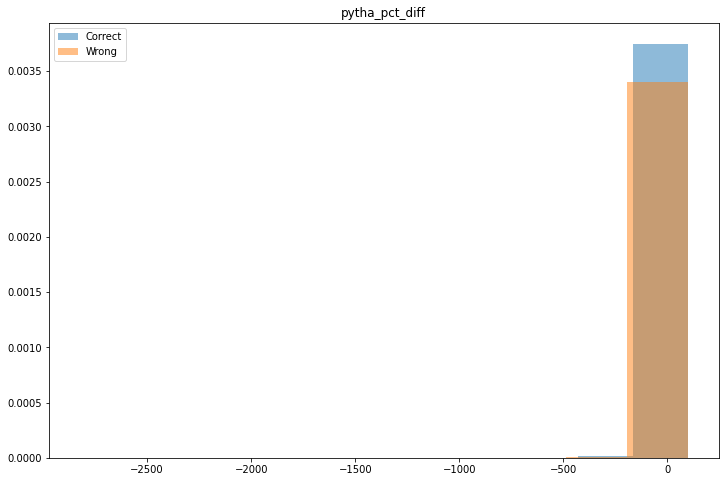

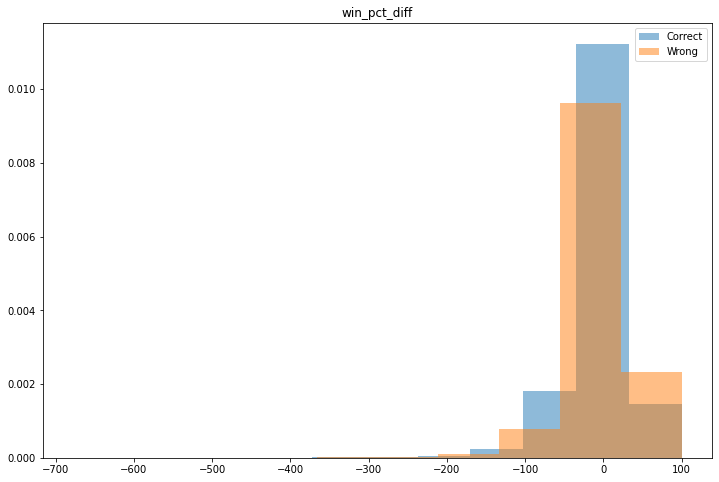

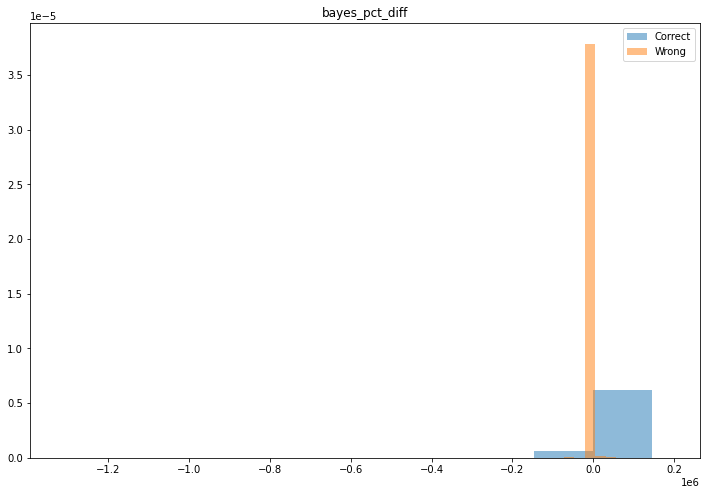

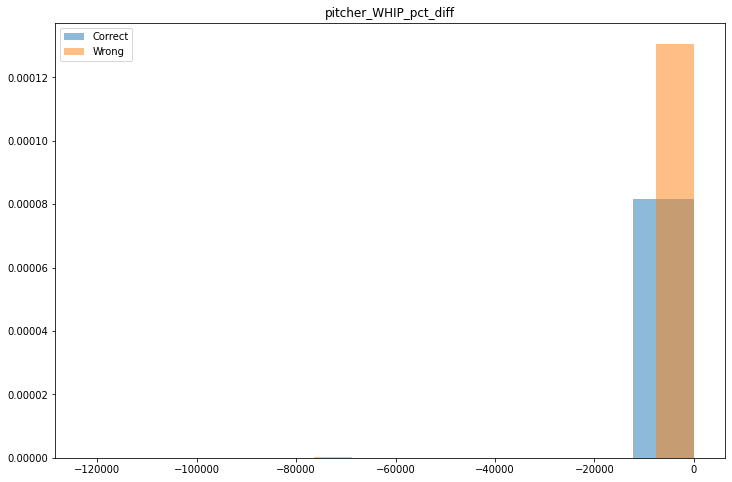

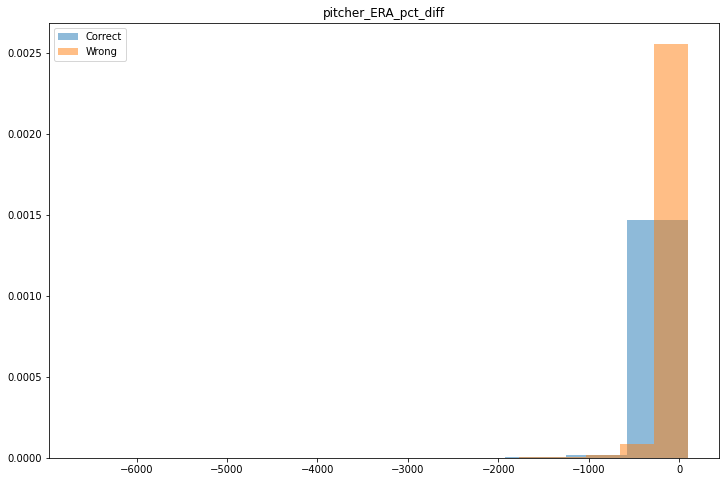

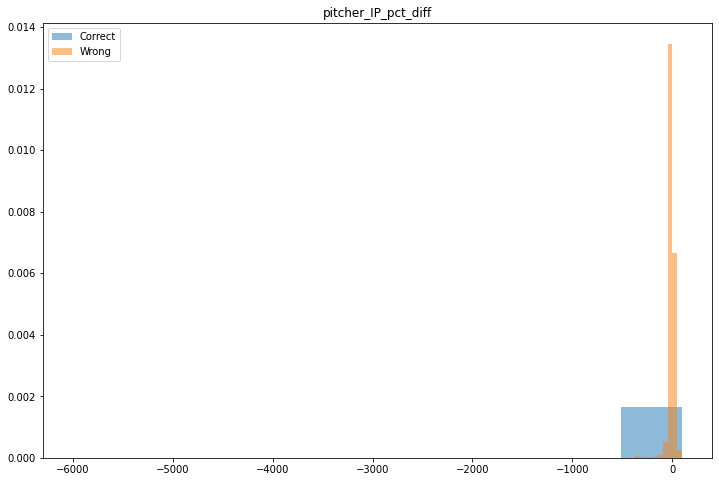

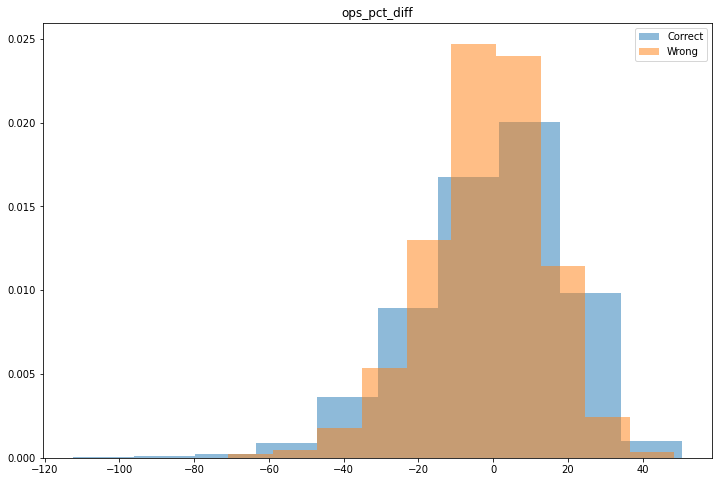

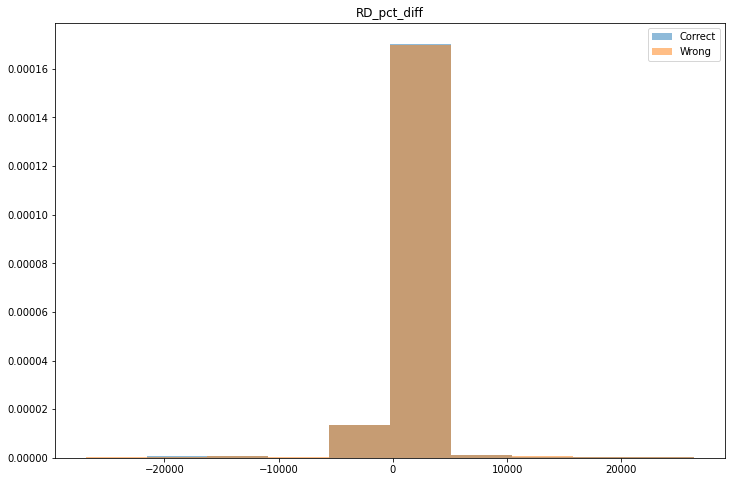

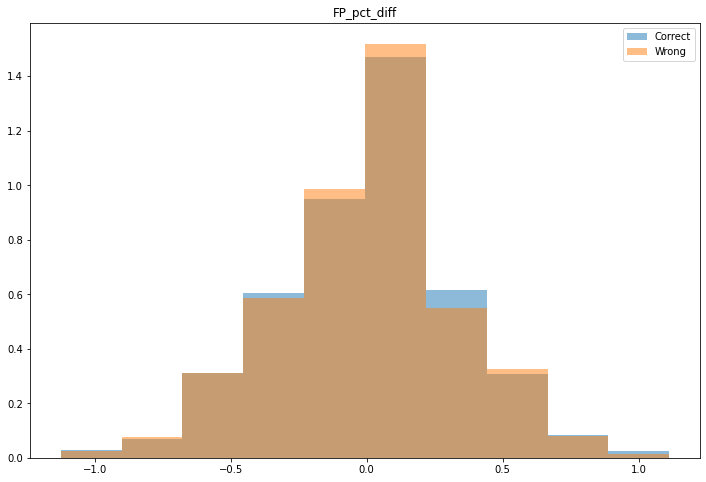

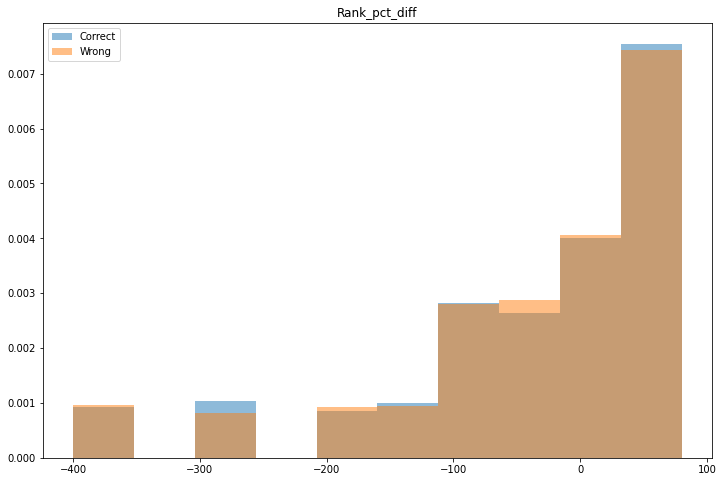

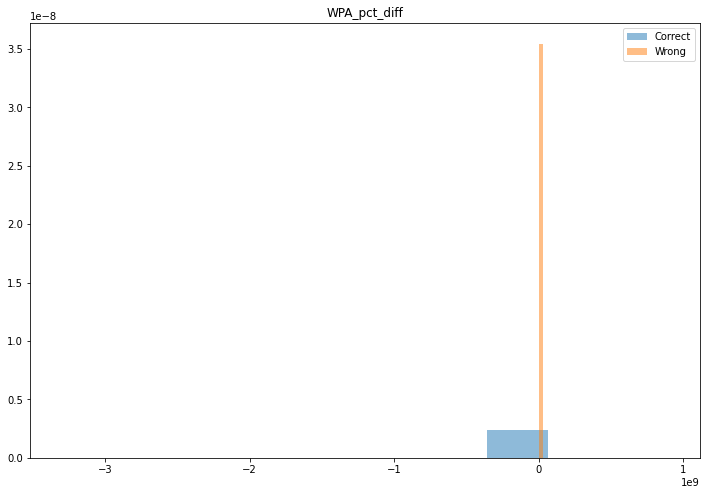

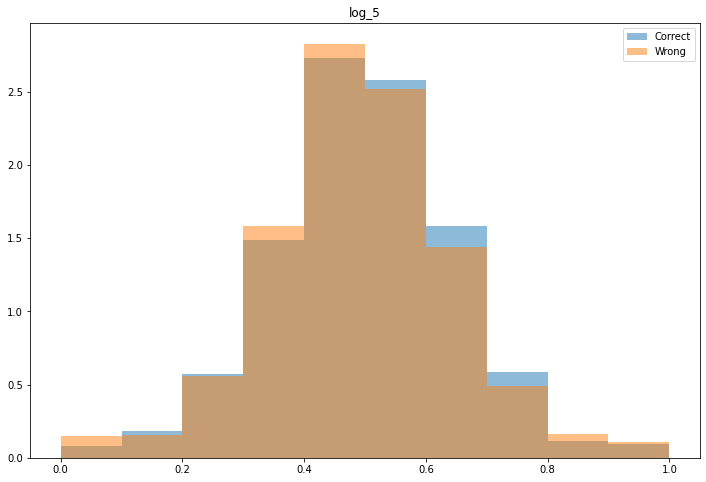

In [14]:
plot_density_by_model(xgb_correct, xgb_wrong)

In [17]:
def plot_density_across_models(col):
    models_correct = [xgb_correct, knn_correct, nn_correct]
    models_wrong = [xgb_wrong, knn_wrong, nn_wrong]
    models_labels = ['XGB', 'KNN', 'NN']
        
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_correct):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} correct')
    plt.show()
    
    plt.figure(figsize=(12, 8))
    for i, m_c in enumerate(models_wrong):
        plt.hist(m_c[col], label=models_labels[i], alpha=0.5, density=True)
    plt.legend()
    plt.title(f'{col} wrong')
    plt.show();

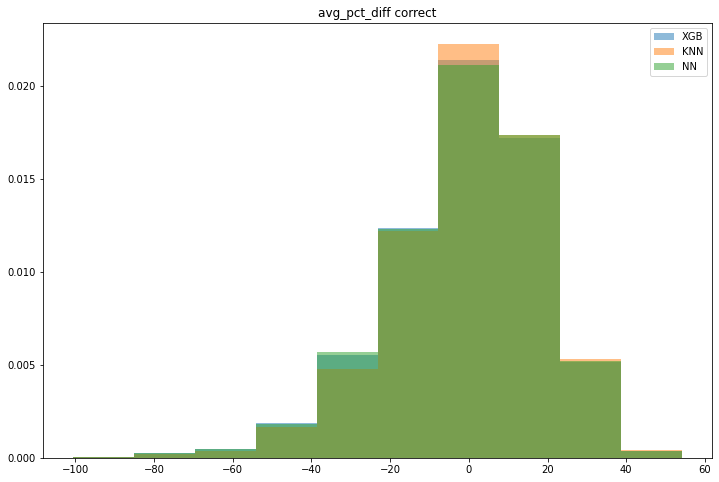

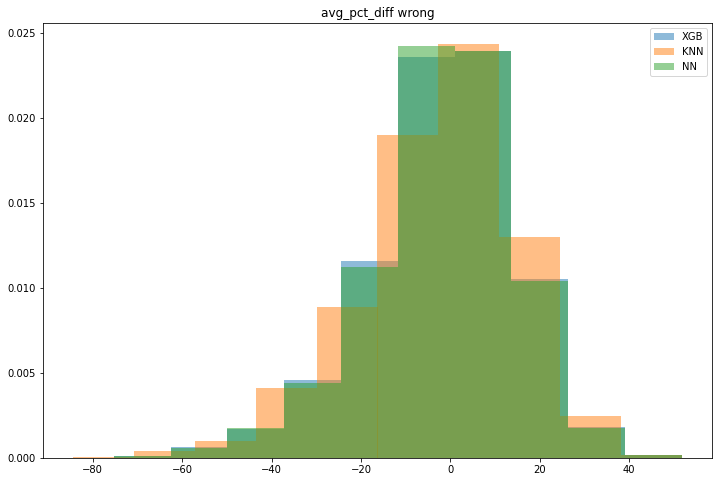

In [18]:
plot_density_across_models('avg_pct_diff')